In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2
import PIL.Image as Image
import tensorflow_hub as hub

%matplotlib inline

In [50]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = IMAGE_SHAPE+(3,))
]) # pretrained full model for making predictions

In [4]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[0]

array([[0.28235294, 0.33333333, 0.07058824],
       [0.31372549, 0.37254902, 0.09019608],
       [0.34901961, 0.41960784, 0.11764706],
       [0.36470588, 0.45490196, 0.12941176],
       [0.38039216, 0.49019608, 0.15686275],
       [0.38431373, 0.51372549, 0.17254902],
       [0.38039216, 0.51764706, 0.17254902],
       [0.37254902, 0.51764706, 0.16470588],
       [0.36470588, 0.52156863, 0.15686275],
       [0.36078431, 0.52156863, 0.16470588],
       [0.36078431, 0.50588235, 0.16862745],
       [0.35686275, 0.49019608, 0.17254902],
       [0.34509804, 0.46666667, 0.16862745],
       [0.34509804, 0.4627451 , 0.18431373],
       [0.34901961, 0.4627451 , 0.20392157],
       [0.35294118, 0.45882353, 0.20392157],
       [0.35686275, 0.45490196, 0.19607843],
       [0.36862745, 0.4627451 , 0.20784314],
       [0.36862745, 0.4745098 , 0.21176471],
       [0.34901961, 0.4745098 , 0.2       ],
       [0.34901961, 0.47058824, 0.20784314],
       [0.35294118, 0.47843137, 0.21568627],
       [0.

In [51]:
gold_fish[np.newaxis, ...].shape # coz the model excepts an extra dimension we give it a extra dimension

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [9]:
prediction_label = np.argmax(result)
prediction_label

2

In [52]:
image_labels = []
with open('labels.txt', 'r') as f: # reading and taking input of all classes from a txt file into an array
    image_labels = f.read().splitlines()
image_labels    

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python'

In [11]:
image_labels[prediction_label]

'goldfish'

In [12]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 11s 0us/step


In [13]:
data_dir

'.\\datasets\\flower_photos'

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [15]:
image_count = len(list(data_dir.glob("*/*.jpg"))) # glob is use for file path searching
image_count

3670

In [16]:
roses = list(data_dir.glob('roses/*'))
roses

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

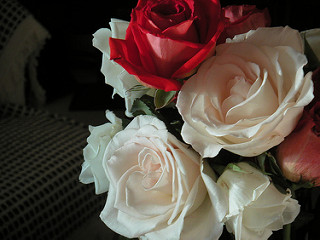

In [17]:
Image.open(roses[1])

In [18]:
daisy = list(data_dir.glob('daisy/*'))
daisy

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [19]:
dandelion = list(data_dir.glob('dandelion/*'))
dandelion

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10443973_aeb97513fc_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10617191174_9a01753241_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10683189_bd6e371b97.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/1074999133_1e4a1e042e.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10777398353_5a20bb218c.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10778387133_9141024b

In [20]:
sunflowers = list(data_dir.glob('sunflowers/*'))
sunflowers

[WindowsPath('datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552002_2b93faf9e7_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1022552036_67d33d5bd8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386522775_4f8c616999_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525005_fd0b7d6c55_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386525695_2c38fea555_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540106_1431e73086_m.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386540696_0a95ee53a8_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1043442695_4556c4c13d_n.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1044296388_912143e1d4.jpg'),
 WindowsPath('datasets/flower_photos/sunflowers/1

In [21]:
tulips = list(data_dir.glob('tulips/*'))
tulips

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 WindowsPath('datasets/flower_photos/tulips/110147301_ad921e2828.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112334842_3ecf7585dd.jpg'),
 WindowsPath('datasets/flower_photos/tulips/112428665_d8f3632f36_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips

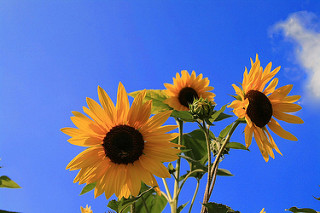

In [23]:
Image.open(sunflowers[10])

In [24]:
flowers_images_dict = {
    'roses' : roses,
    'daisy' : daisy,
    'dandelion' : dandelion,
    'sunflowers' : sunflowers,
    'tulip' : tulips
}

In [25]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulip' : 4
}

In [26]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [27]:
img = cv2.resize(img, (224, 224))
img.shape

(224, 224, 3)

In [29]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [30]:
X = np.array(X)
y = np.array(y)

In [31]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, random_state=0)

In [32]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [33]:
X_train_scaled.shape

(2752, 224, 224, 3)

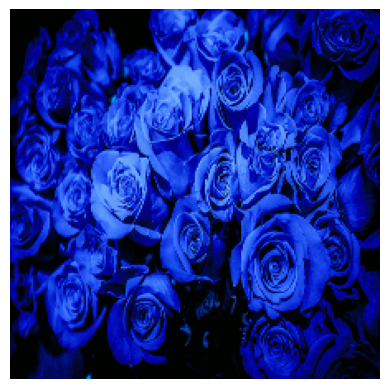

In [42]:
plt.axis('off')
plt.imshow(X[2])

In [36]:
predict = classifier.predict(np.array([X[0], X[1], X[2]]))

In [37]:
predict = np.argmax(predict, axis = 1)
predict

array([795, 880, 795], dtype=int64)

In [40]:
image_labels[880]

'umbrella'

In [57]:
feature_extraction_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4" # pretrained feature extraction model, it is a model without the last classifiction layer in the model
pretrained_model_with_only_top_layers = hub.KerasLayer(
                    feature_extraction_model, input_shape = (224,224, 3), trainable=False) # trainable false meaning freezing all the layers while training so the weights doesn't change

In [54]:
num_of_flowers = 5

model = keras.Sequential([
    pretrained_model_with_only_top_layers,
    keras.layers.Dense(num_of_flowers) # adding the last classification layer for our training
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
model.compile(
    optimizer='adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 38ms/step - loss: 0.7778 - acc: 0.7166
Epoch 2/5
86/86 [==============================] - 3s 37ms/step - loss: 0.4038 - acc: 0.8597
Epoch 3/5
86/86 [==============================] - 3s 37ms/step - loss: 0.3158 - acc: 0.8968
Epoch 4/5
86/86 [==============================] - 3s 37ms/step - loss: 0.2653 - acc: 0.9168
Epoch 5/5
86/86 [==============================] - 3s 37ms/step - loss: 0.2264 - acc: 0.9375


In [56]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 2s 51ms/step - loss: 0.3863 - acc: 0.8617


[0.38625842332839966, 0.8616557717323303]